In [50]:
#!pip install fuzzylogic
from fuzzylogic.classes import Domain, Set, Rule
from fuzzylogic.functions import triangular
from matplotlib import pyplot
from fuzzylogic.functions import R, S, alpha
pyplot.rc("figure", figsize=(5, 5))

# Noise Level Optimization in Open Office Spaces

**Scenario Overview:**
In a modern open office space, it's essential to maintain a conducive work environment. However, noise levels can fluctuate based on factors like the number of people present (occupancy density) and the background noise level. The goal is to use a Fuzzy Logic Controller (FLC) to dynamically adjust noise levels to ensure productivity and comfort.

**Parameters:**

1. **Background Noise Level (BNL):**
   - This represents the ambient noise level in the open office space. It's measured in decibels (dB).
   - Linguistic Variables: "Low", "Moderate", "High", and "Very High".
   - Example: "Moderate" background noise could be from a printer or low conversation.

2. **Occupancy Density (OD):**
   - This indicates how densely populated the office space is. It's categorized into "Sparse", "Moderate", "High", and "Very High".
   - Example: "Sparse" occupancy would be a few people, while "Very High" occupancy means the space is densely populated.

3. **Noise Adjustment (NA):**
   - This is the output indicating the level of adjustment needed to maintain a conducive work environment.
   - Linguistic Variables: "Minimal", "Moderate", and "Significant".
   - Example: "Moderate" adjustment might involve slightly increasing background music.

**1. Background Noise Level (BNL):**

   - Linguistic Variables: "Low", "Moderate", "High", "Very High"

   - Membership Functions:

      - Low:
        - Membership function: Bounded Linear
        - Parameters: [0, 10, 20]

      - Moderate:
        - Membership function: Triangular
        - Parameters: [10, 30, 50]

      - High:
        - Membership function: Triangular
        - Parameters: [40, 60, 80]

      - Very High:
        - Membership function: Bounded Linear
        - Parameters: [70, 90, 100]

Text(0.5, 1.0, 'Background Noise Level')

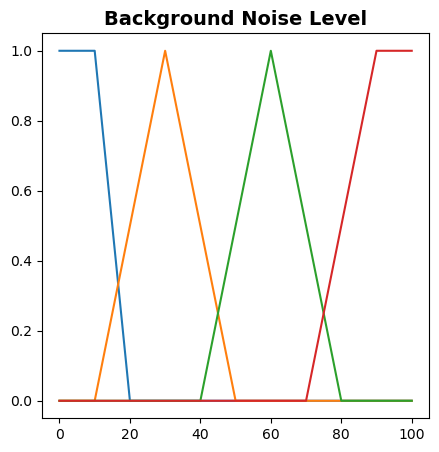

In [51]:
BNL = Domain("background_noise_level", 0, 100, res=0.1)

BNL.low = S(10, 20)
BNL.low.plot()

BNL.moderate = triangular(10, 50, c=30, c_m=1, no_m=0)
BNL.moderate.plot()

BNL.high = triangular(40, 80, c=60, c_m=1, no_m=0)
BNL.high.plot()

BNL.veryHigh = R(70, 90)
BNL.veryHigh.plot()
pyplot.title("Background Noise Level", fontweight='bold', fontsize=14)

**2. Occupancy Density (OD):**

   - Linguistic Variables: "Sparse", "Moderate", "High", "Very High"

   - Membership Functions:

      - Sparse:
        - Membership function: Bounded Linear
        - Parameters: [0, 5, 10]

      - Moderate:
        - Membership function: Triangular
        - Parameters: [5, 15, 25]

      - High:
        - Membership function: Triangular
        - Parameters: [20, 35, 50]

      - Very High:
        - Membership function: Bounded Linear
        - Parameters: [45, 60, 75]

Text(0.5, 1.0, 'Occupancy Density')

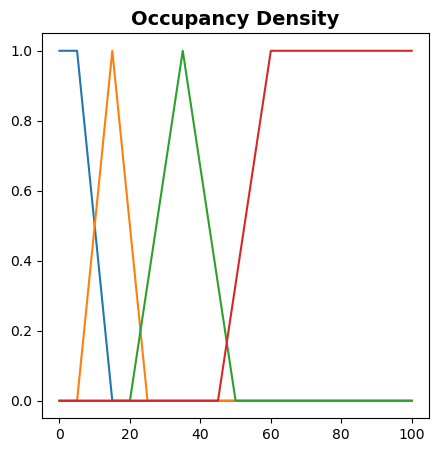

In [52]:
OD = Domain("occupancy_density", 0, 100, res=0.1)

OD.sparse = S(5, 15)
OD.sparse.plot()

OD.moderate = triangular(5, 25, c=15, c_m=1, no_m=0)
OD.moderate.plot()

OD.high = triangular(20, 50, c=35, c_m=1, no_m=0)
OD.high.plot()

OD.veryHigh = R(45, 60)
OD.veryHigh.plot()
pyplot.title("Occupancy Density", fontweight='bold', fontsize=14)

**3. Noise Adjustment (NA):**

   - Linguistic Variables: "Minimal", "Moderate", "Significant"

   - Membership Functions:

      - Minimal:
        - Membership function: Bounded Linear
        - Parameters: [0, 20, 40]

      - Moderate:
        - Membership function: Triangular
        - Parameters: [30, 50, 70]

      - Significant:
        - Membership function: Bounded Linear
        - Parameters: [60, 80, 100]


Text(0.5, 1.0, 'Noise Adjustment')

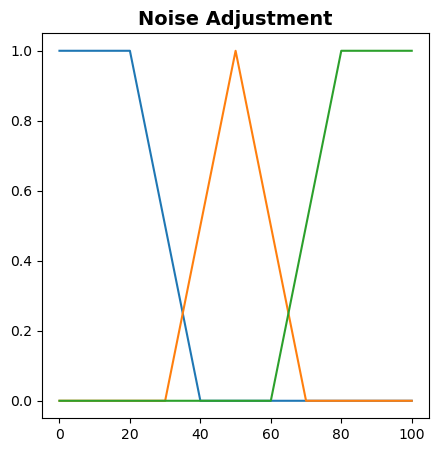

In [53]:
NA = Domain("noise_adjustment", 0, 100, res=0.1)

NA.minimal = S(20, 40)
NA.minimal.plot()

NA.moderate = triangular(30, 70, c=50, c_m=1, no_m=0)
NA.moderate.plot()

NA.significant = R(60, 80)
NA.significant.plot()
pyplot.title("Noise Adjustment", fontweight='bold', fontsize=14)

1. **Rule 1:** If BNL is "Low" and OD is "Sparse", then NA is "Minimal".
2. **Rule 2:** If BNL is "Low" and OD is "Moderate", then NA is "Minimal".
3. **Rule 3:** If BNL is "Low" and OD is "High", then NA is "Moderate".
4. **Rule 4:** If BNL is "Low" and OD is "Very High", then NA is "Significant".
5. **Rule 5:** If BNL is "Moderate" and OD is "Sparse", then NA is "Minimal".
6. **Rule 6:** If BNL is "Moderate" and OD is "Moderate", then NA is "Minimal".
7. **Rule 7:** If BNL is "Moderate" and OD is "High", then NA is "Moderate".
8. **Rule 8:** If BNL is "Moderate" and OD is "Very High", then NA is "Significant".
9. **Rule 9:** If BNL is "High" and OD is "Sparse", then NA is "Moderate".
10. **Rule 10:** If BNL is "High" and OD is "Moderate", then NA is "Moderate".
11. **Rule 11:** If BNL is "High" and OD is "High", then NA is "Significant".
12. **Rule 12:** If BNL is "High" and OD is "Very High", then NA is "Significant".
13. **Rule 13:** If BNL is "Very High" and OD is "Sparse", then NA is "Moderate".
14. **Rule 14:** If BNL is "Very High" and OD is "Moderate", then NA is "Significant".
15. **Rule 15:** If BNL is "Very High" and OD is "High", then NA is "Significant".
16. **Rule 16:** If BNL is "Very High" and OD is "Very High", then NA is "Significant".

### Tables of Rules
| **BNL/OD** | Sparse | Moderate | High | Very High |
| --- | --- | --- | --- | --- |
| **Low** | minimal | minimal | moderate | significant |
| **Moderate** | minimal | minimal | moderate | significant |
| **High** | moderate | moderate | significant | significant |
| **Very High** | moderate | significant | significant | significant |

In [54]:
rules = []

rules.append(Rule({(BNL.low, OD.sparse): NA.minimal})) #Rule 1
rules.append(Rule({(BNL.low, OD.moderate): NA.minimal})) #Rule 2
rules.append(Rule({(BNL.low, OD.high): NA.moderate})) #Rule 3
rules.append(Rule({(BNL.low, OD.veryHigh): NA.significant})) #Rule 4
rules.append(Rule({(BNL.moderate, OD.sparse): NA.minimal})) #Rule 5
rules.append(Rule({(BNL.moderate, OD.moderate): NA.minimal})) #Rule 6
rules.append(Rule({(BNL.moderate, OD.high): NA.moderate})) #Rule 7
rules.append(Rule({(BNL.moderate, OD.veryHigh): NA.significant})) #Rule 8
rules.append(Rule({(BNL.high, OD.sparse): NA.moderate})) #Rule 9
rules.append(Rule({(BNL.high, OD.moderate): NA.moderate})) #Rule 10
rules.append(Rule({(BNL.high, OD.high): NA.significant})) #Rule 11
rules.append(Rule({(BNL.high, OD.veryHigh): NA.significant})) #Rule 12
rules.append(Rule({(BNL.veryHigh, OD.sparse): NA.moderate})) #Rule 13
rules.append(Rule({(BNL.veryHigh, OD.moderate): NA.significant})) #Rule 14
rules.append(Rule({(BNL.veryHigh, OD.high): NA.significant})) #Rule 15
rules.append(Rule({(BNL.veryHigh, OD.veryHigh): NA.significant})) #Rule 16

Sample Input:

In [56]:
values = {BNL: 60, OD: 10}
for i in range(len(rules)):
    print("Rule", i+1, ":", rules[i](values))
    
print("Output:", sum(rules)(values))

Rule 1 : None
Rule 2 : None
Rule 3 : None
Rule 4 : None
Rule 5 : None
Rule 6 : None
Rule 7 : None
Rule 8 : None
Rule 9 : 49.95004995004995
Rule 10 : 49.95004995004995
Rule 11 : None
Rule 12 : None
Rule 13 : None
Rule 14 : None
Rule 15 : None
Rule 16 : None
Output: 49.95004995004995
